In [1]:
# Load libraries
library(tidyverse)
library(stringr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# Import the data from the King County Housing csv file
df_orig <- read_csv("kc_house_data.csv")
glimpse(df_orig)

Parsed with column specification:
cols(
  .default = col_integer(),
  id = col_character(),
  date = col_datetime(format = ""),
  price = col_double(),
  bathrooms = col_double(),
  floors = col_double(),
  lat = col_double(),
  long = col_double()
)
See spec(...) for full column specifications.


Observations: 21,613
Variables: 21
$ id            <chr> "7129300520", "6414100192", "5631500400", "2487200875...
$ date          <dttm> 2014-10-13, 2014-12-09, 2015-02-25, 2014-12-09, 2015...
$ price         <dbl> 221900, 538000, 180000, 604000, 510000, 1225000, 2575...
$ bedrooms      <int> 3, 3, 2, 4, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 5, 4, 3, 4,...
$ bathrooms     <dbl> 1.00, 2.25, 1.00, 3.00, 2.00, 4.50, 2.25, 1.50, 1.00,...
$ sqft_living   <int> 1180, 2570, 770, 1960, 1680, 5420, 1715, 1060, 1780, ...
$ sqft_lot      <int> 5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 74...
$ floors        <dbl> 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0...
$ waterfront    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ view          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,...
$ condition     <int> 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4,...
$ grade         <int> 7, 7, 6, 7, 8, 11, 7, 7, 7, 7, 8, 7, 7, 7, 7, 9, 7, 7...
$ sqft_above    <

In [3]:
# Create a user defined function named gg_scatter() 
# that accepts a data frame and an x an y column names 
# and creates a scatter plot (think about including jitter, alpha, and a trendline)
gg_scatter <- function(data, x_col, y_col, title_param = str_c(y_col, " vs ", x_col),
                       subtitle_param = str_c("Row count:", data %>% nrow()),
                       alpha_param = 0.5, method_param = "lm", se_param = FALSE) {
  plt <- data %>% 
    ggplot(mapping = aes_string(x = x_col, y = y_col)) + 
    geom_jitter(alpha = alpha_param) + 
    geom_smooth(method = method_param, se = se_param) +
    ggtitle(title_param, subtitle = subtitle_param)
  print(plt)
}

In [4]:
# Create a user defined function named save_plot() to save ggplots to a .png file on disk.
# Incorporate save_plot into gg_scatter

# save_plot
save_plot <- function(filename) {
  filename %>% ggsave() # file extension will be defined when called in gg_scatter
}

# Incorporate save_plot into gg_scatter
gg_scatter <- function(data, x_col, y_col, title_param = str_c(y_col, " vs ", x_col),
                       subtitle_param = str_c("Row count:", data %>% nrow()),
                       alpha_param = 0.5, method_param = "lm", se_param = FALSE) {
  plt <- data %>% 
    ggplot(mapping = aes_string(x = x_col, y = y_col)) + 
    geom_jitter(alpha = alpha_param) + 
    geom_smooth(method = method_param, se = se_param) +
    ggtitle(title_param, subtitle = subtitle_param)
  print(plt)
  
  # save plot to file
  str_c(x_col, "_", y_col, ".png") %>% save_plot()
}

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


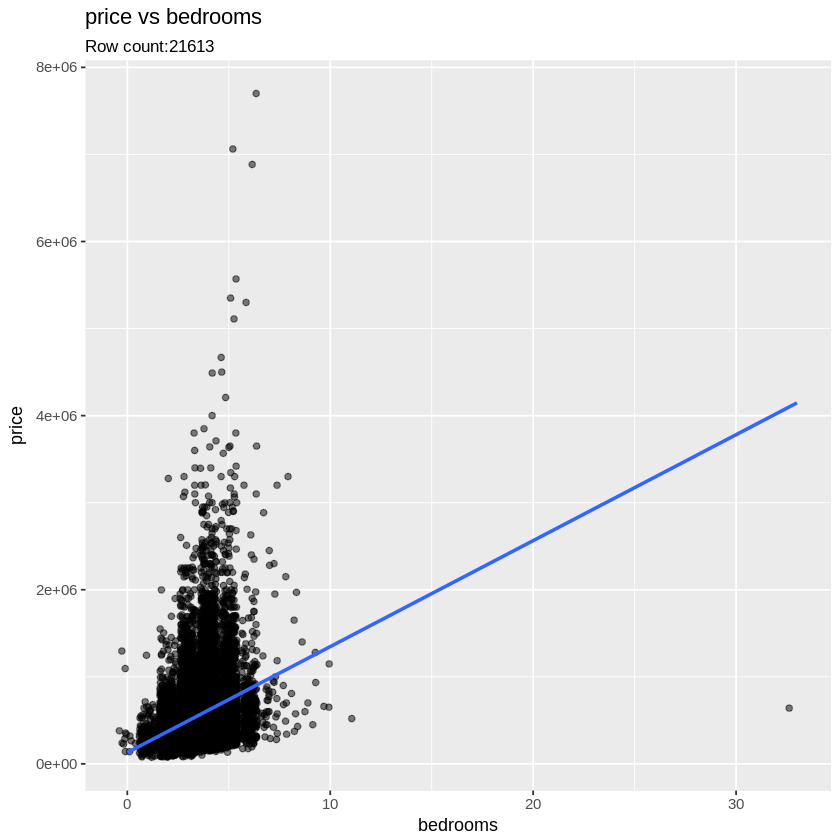

Saving 6.67 x 6.67 in image


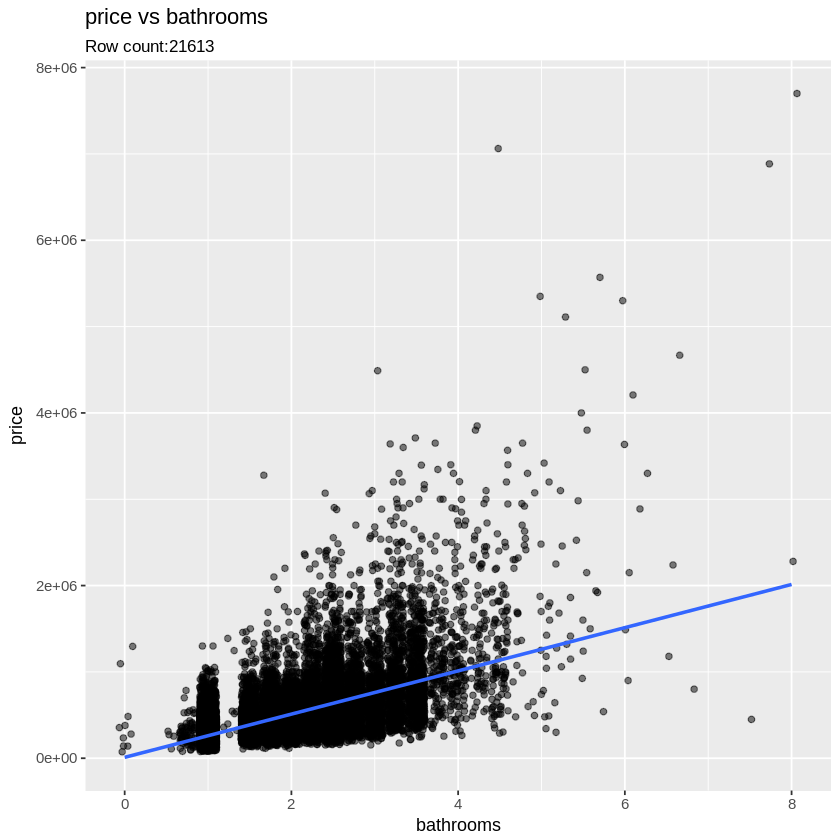

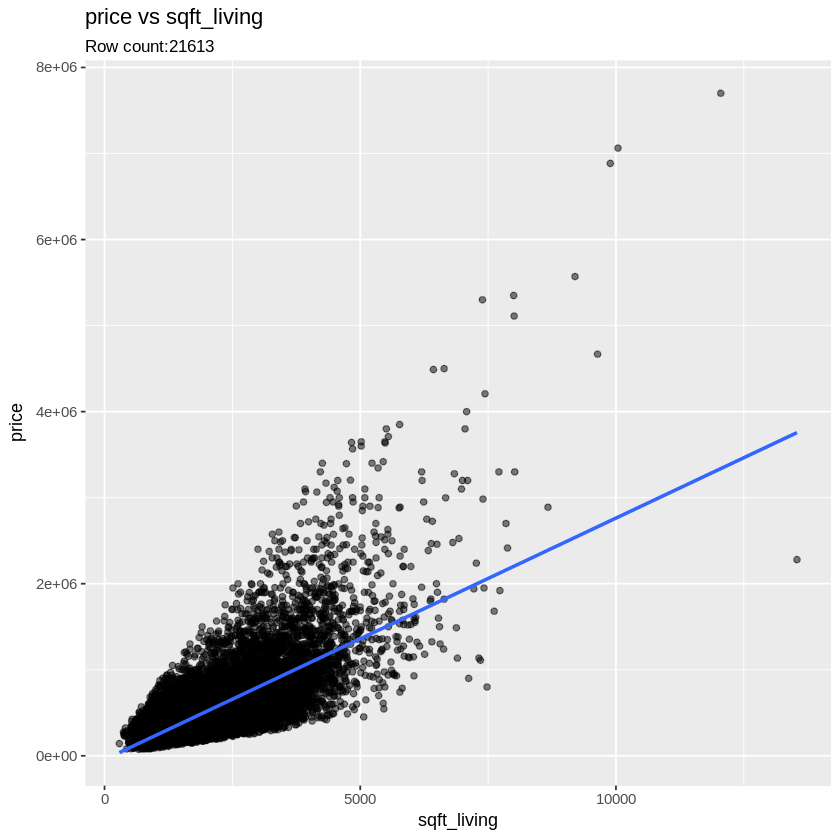

In [5]:
# Call gg_scatter with y = price and x = 3 different columns
x_cols <- c("bedrooms", "bathrooms", "sqft_living")
for(x_col in x_cols) {
  df_orig %>% gg_scatter(x_col, "price")
}

[1] "all numeric variables excluding price:"                                                                                                                                                  
[2] "bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15"


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


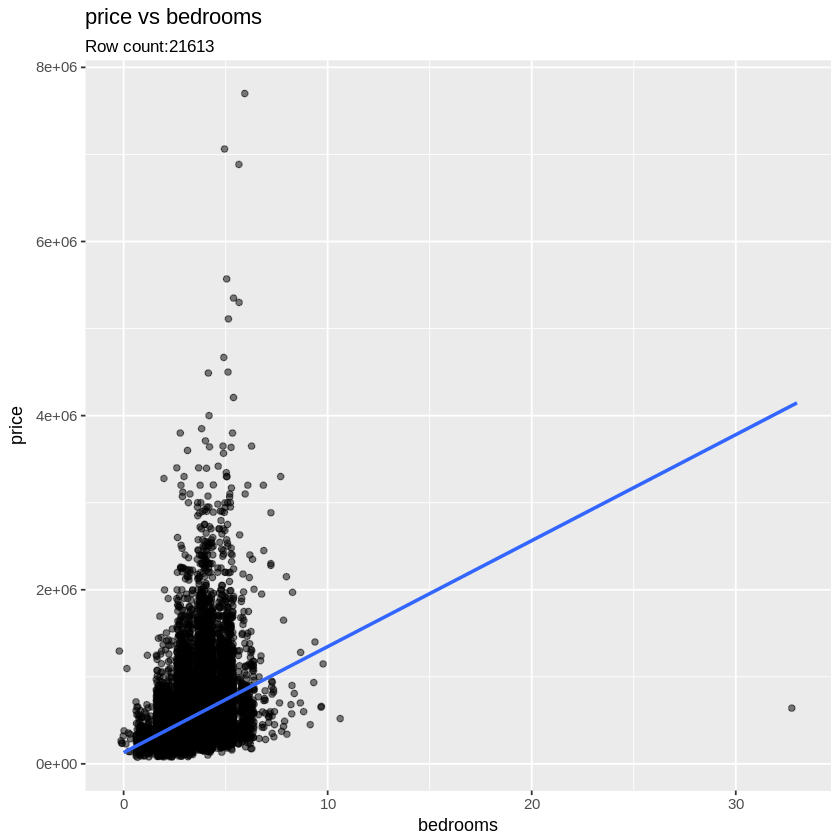

Saving 6.67 x 6.67 in image


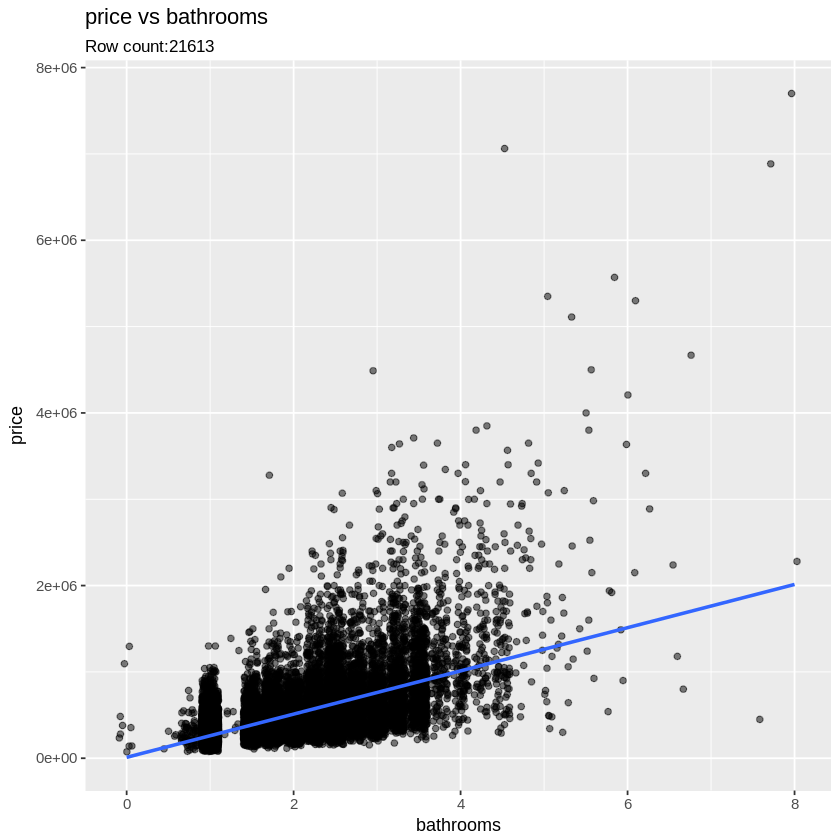

Saving 6.67 x 6.67 in image


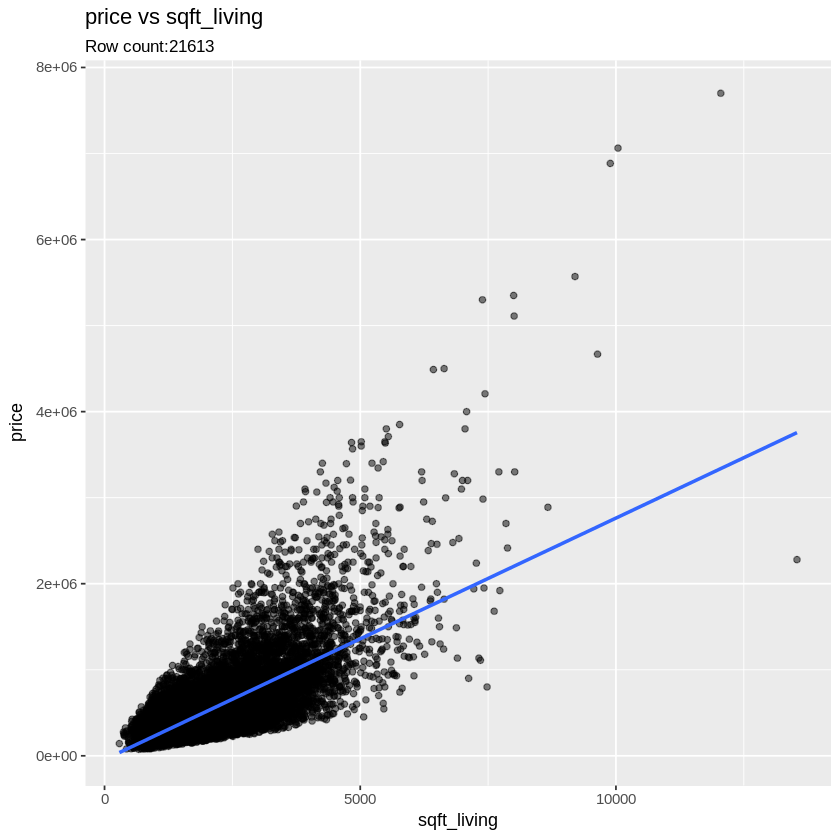

Saving 6.67 x 6.67 in image


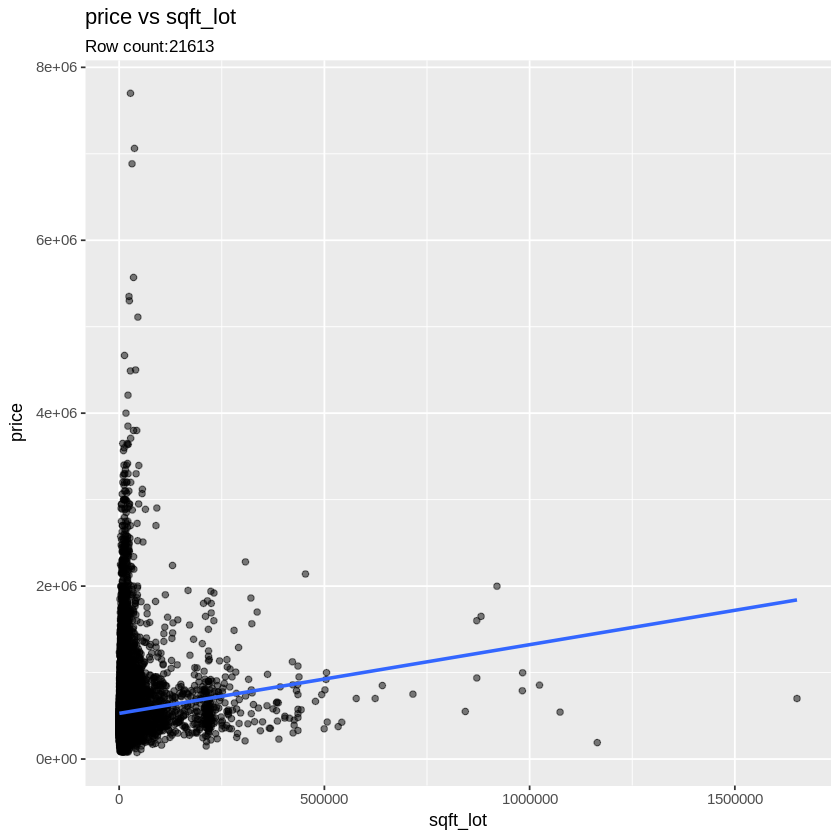

Saving 6.67 x 6.67 in image


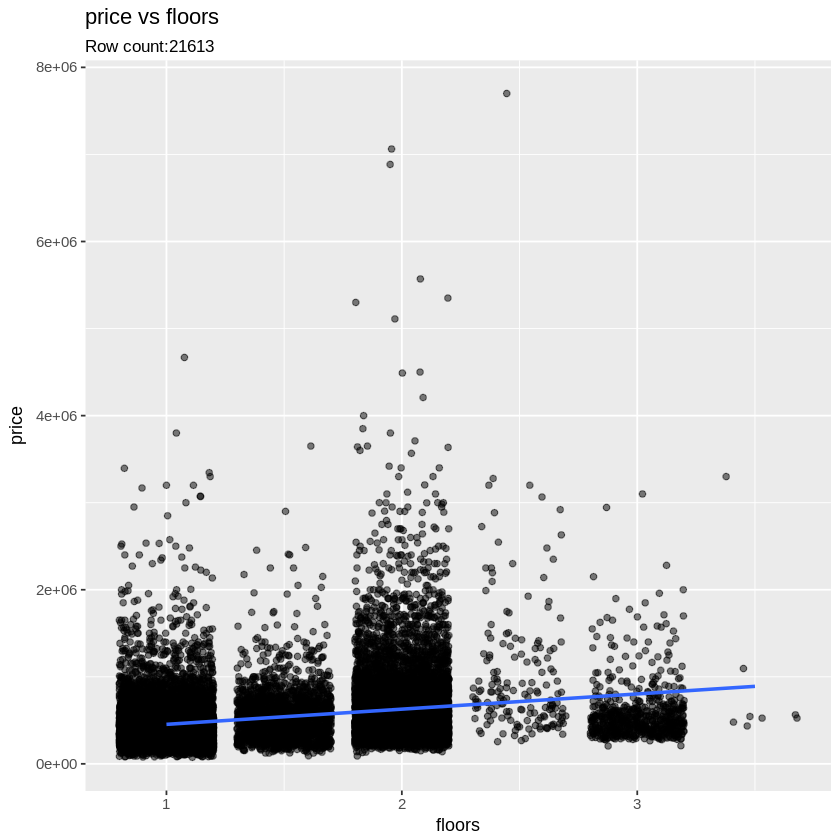

Saving 6.67 x 6.67 in image


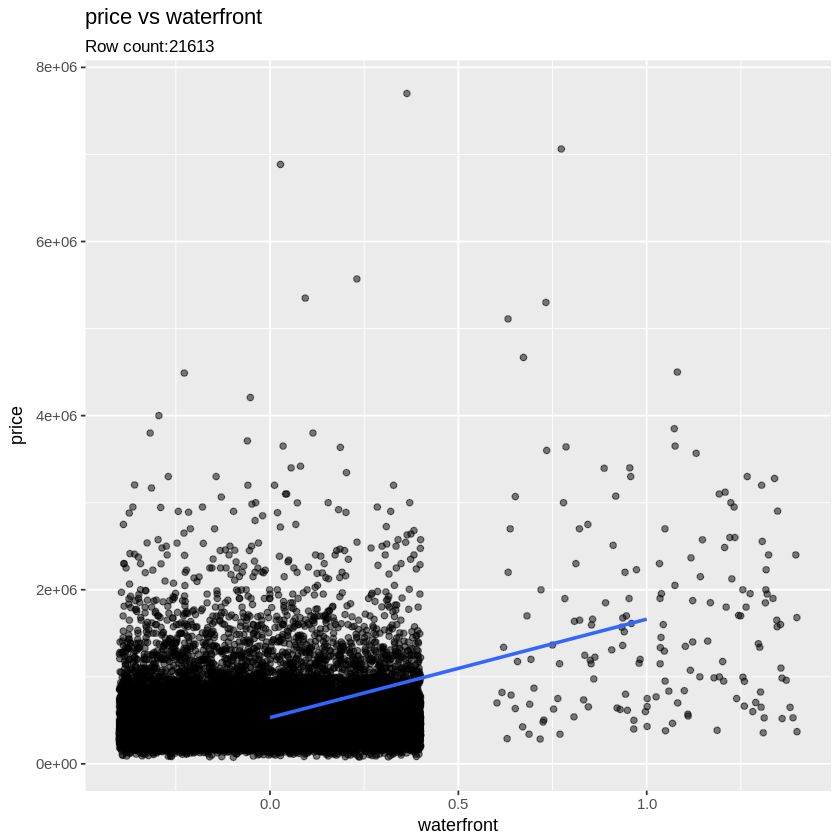

Saving 6.67 x 6.67 in image


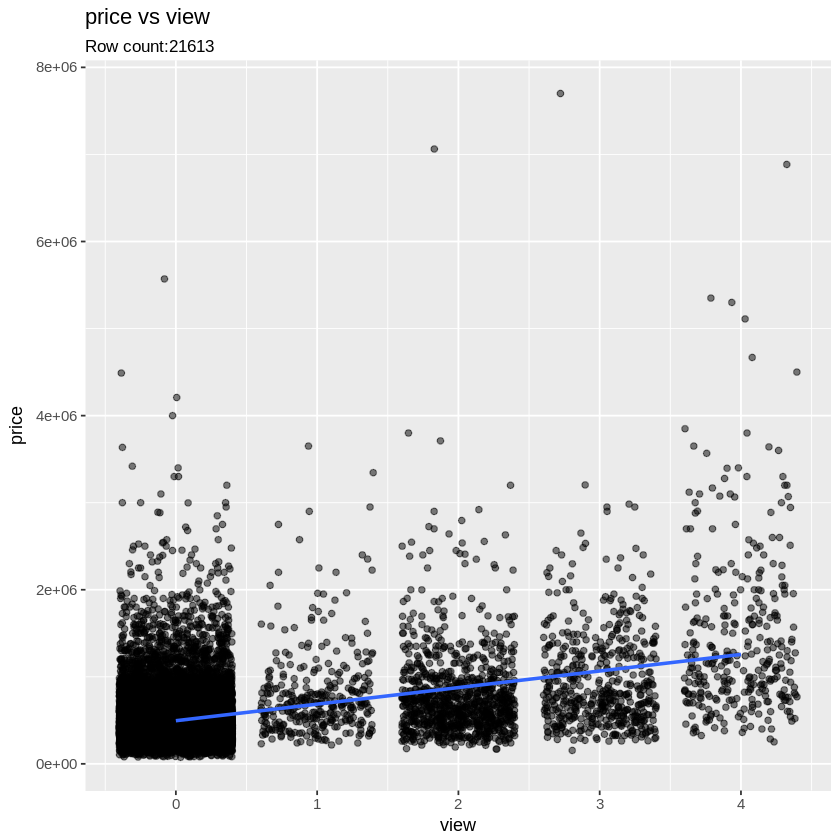

Saving 6.67 x 6.67 in image


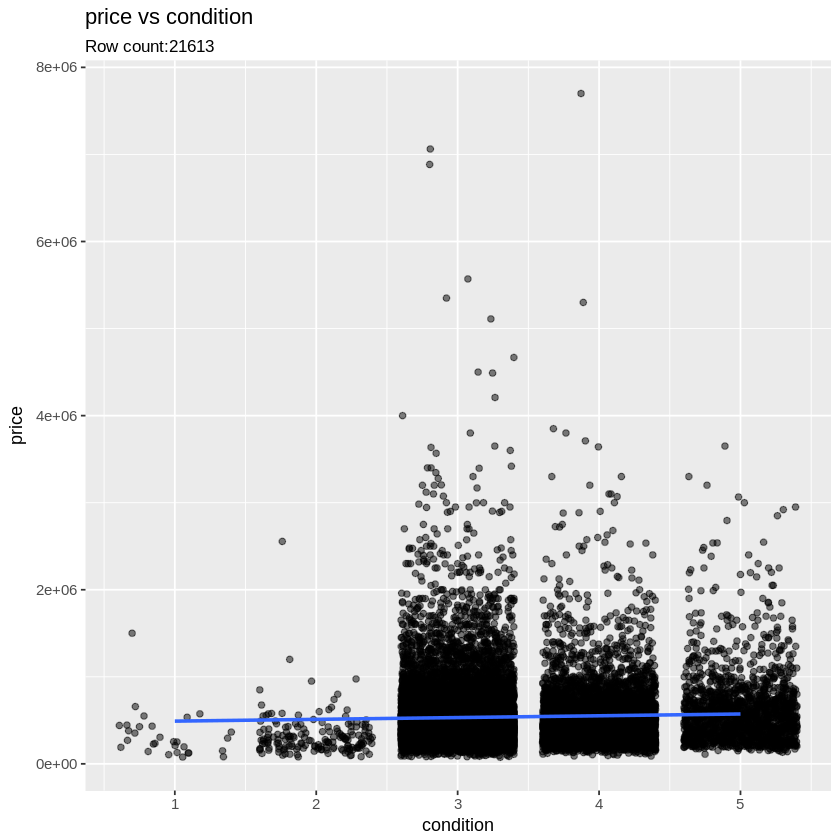

Saving 6.67 x 6.67 in image


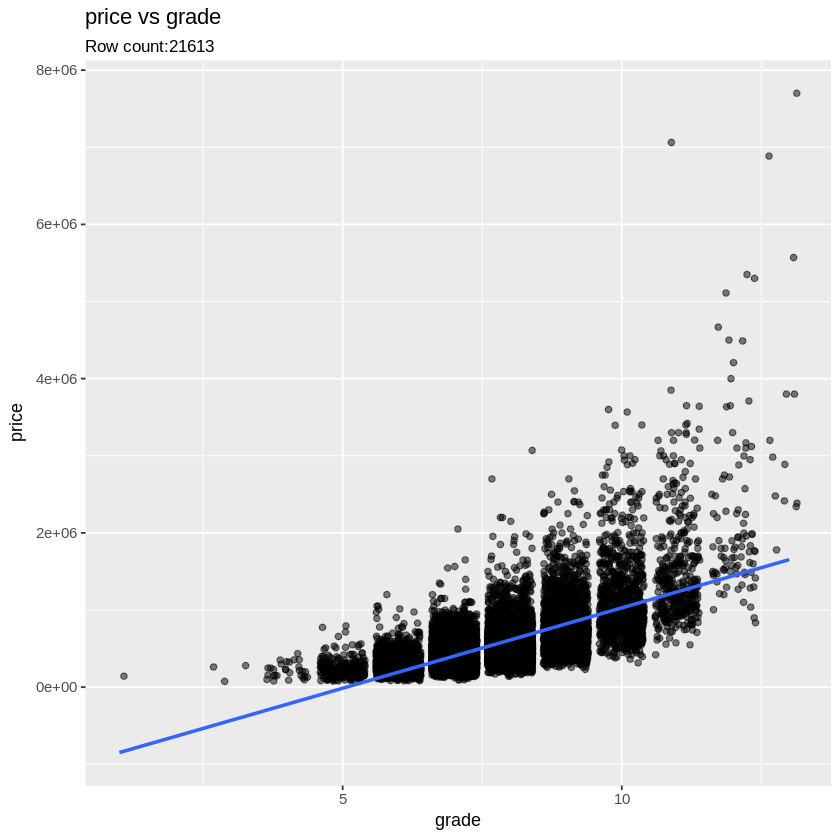

Saving 6.67 x 6.67 in image


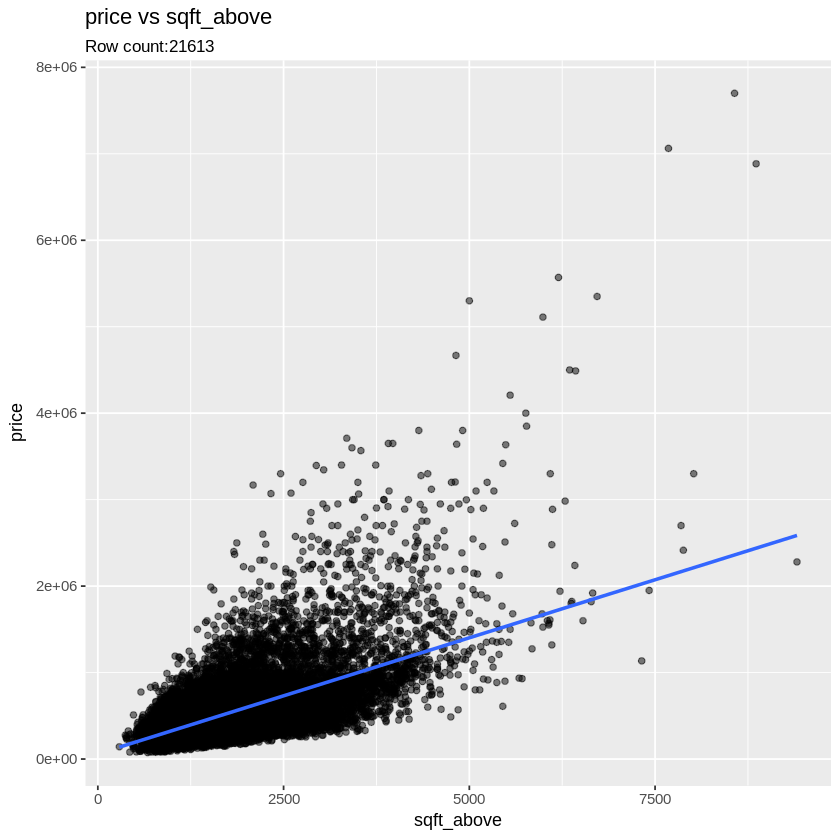

Saving 6.67 x 6.67 in image


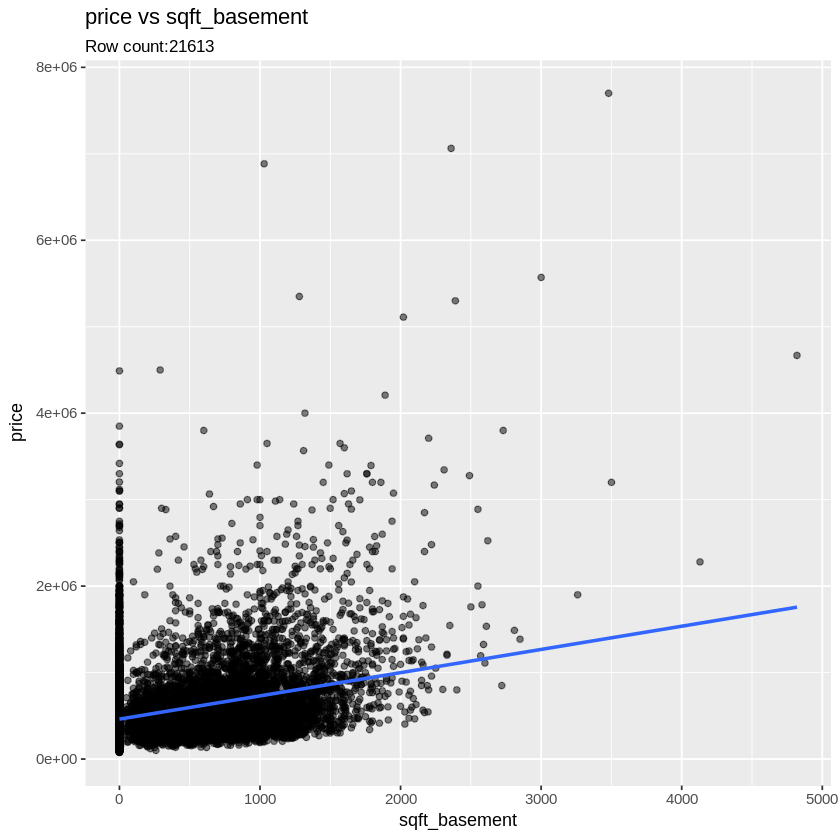

Saving 6.67 x 6.67 in image


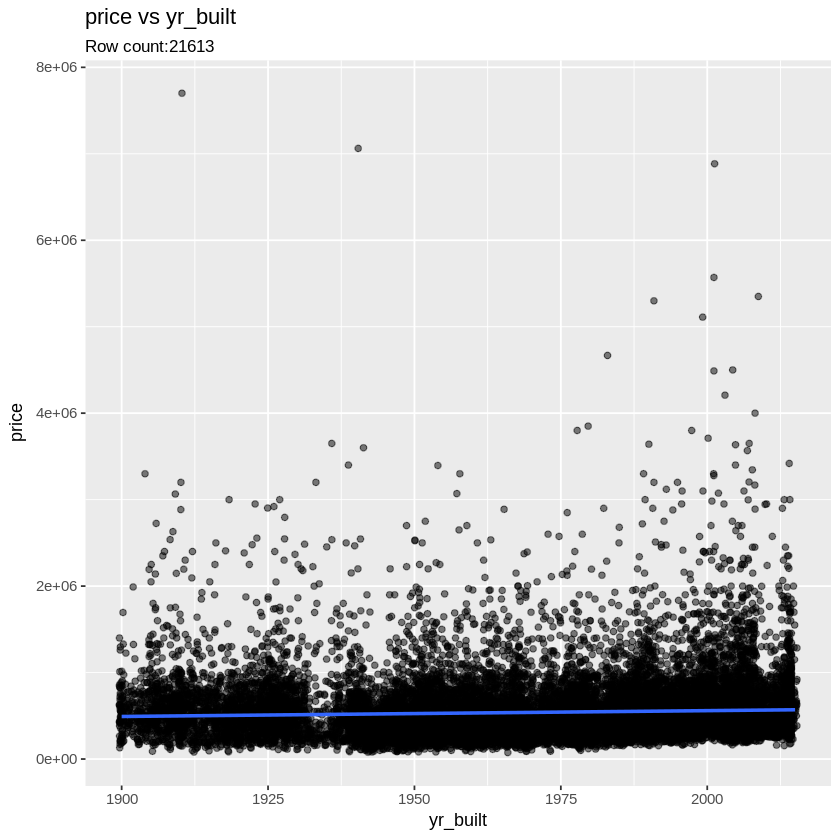

Saving 6.67 x 6.67 in image


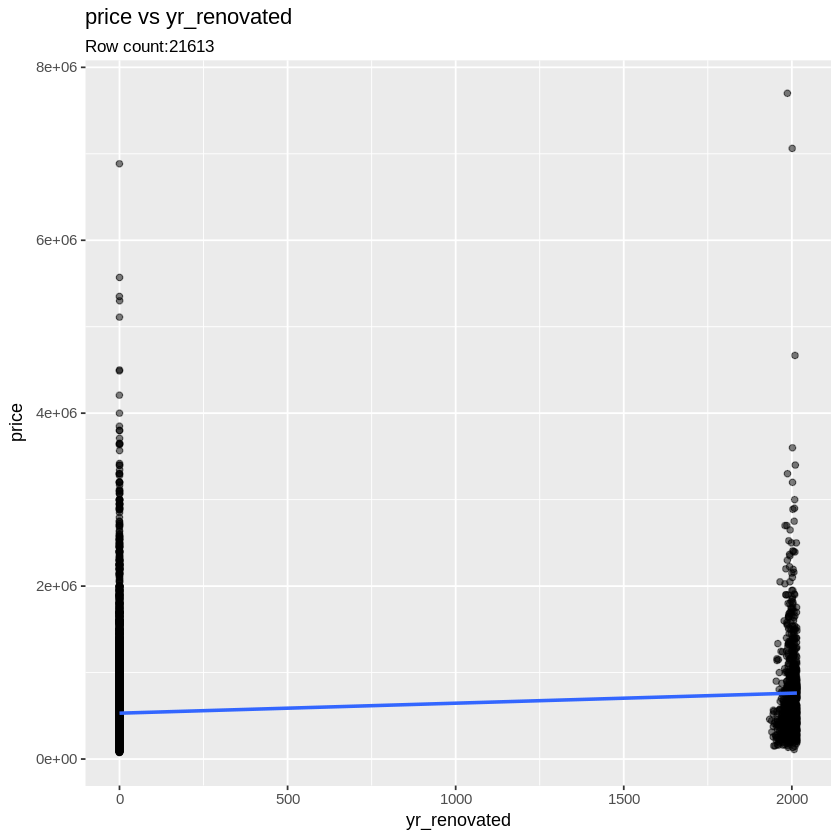

Saving 6.67 x 6.67 in image


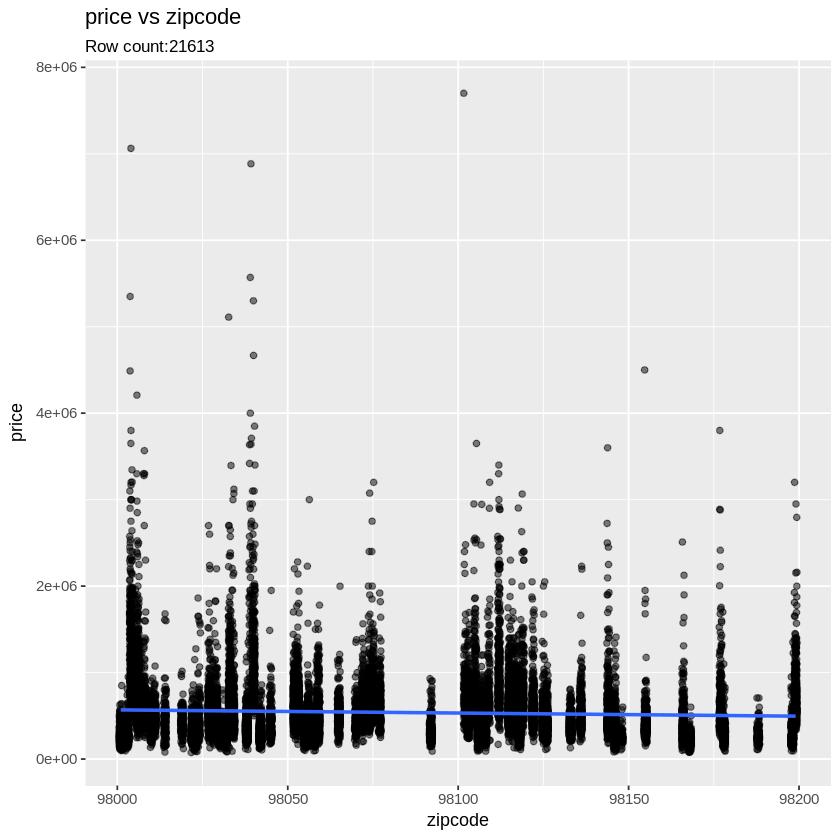

Saving 6.67 x 6.67 in image


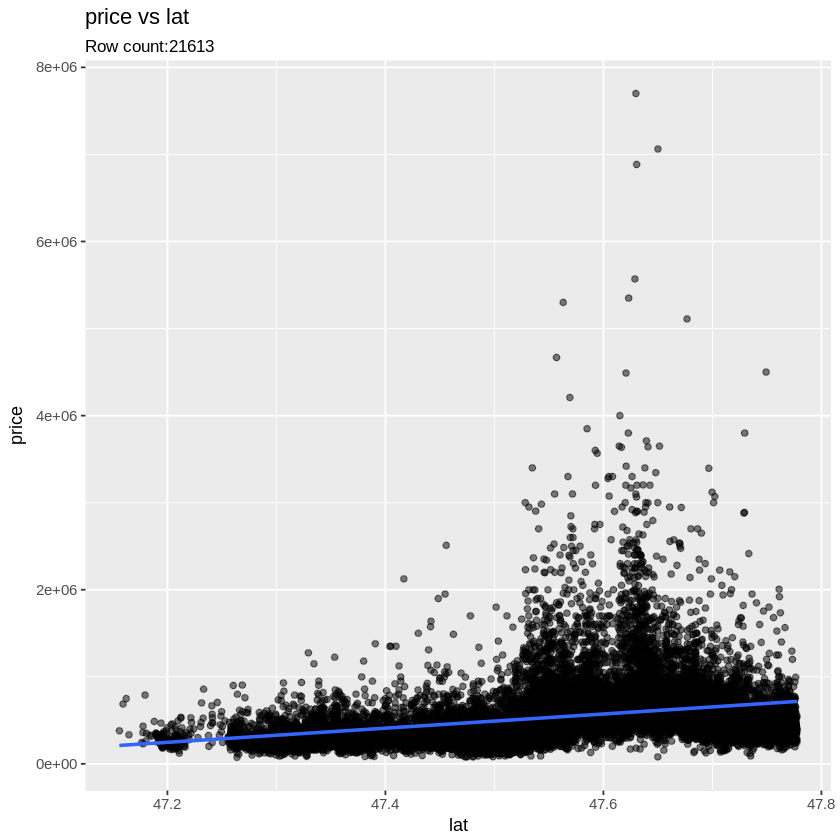

Saving 6.67 x 6.67 in image


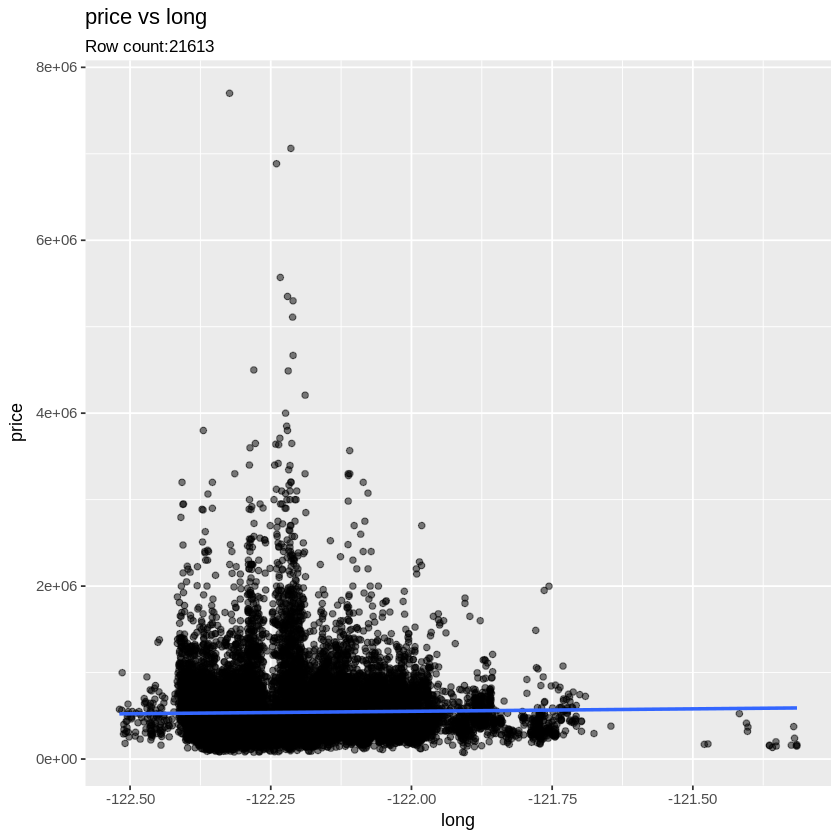

Saving 6.67 x 6.67 in image


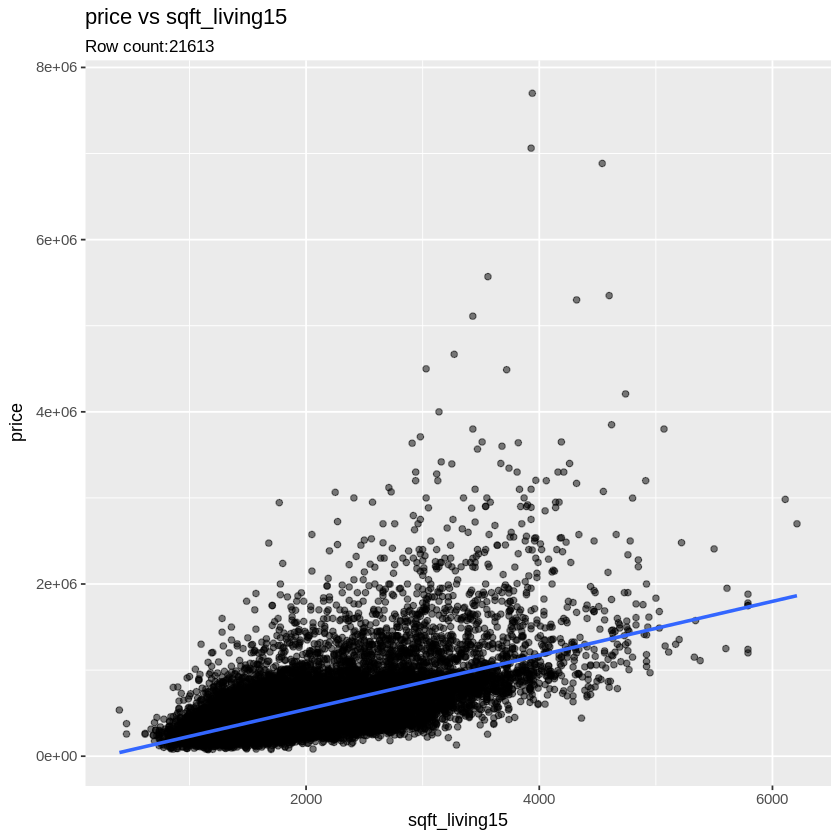

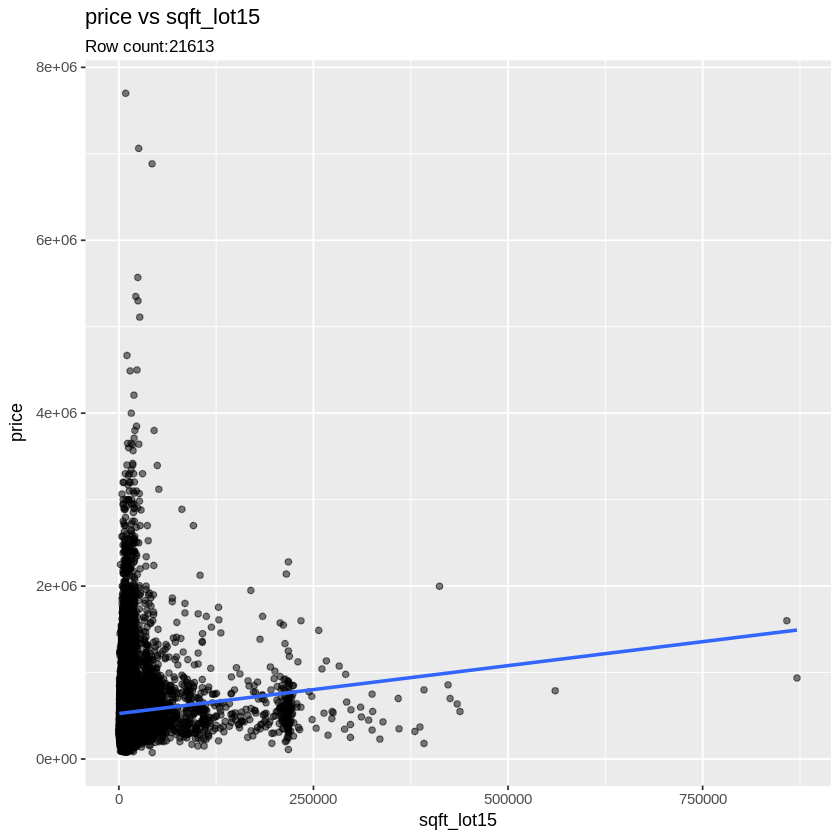

In [6]:
# select numeric variables
df_num = select_if(df_orig, is.numeric)
y_col <- "price"
x_cols <- df_num %>% names()
x_cols <- x_cols[!str_detect(x_cols, y_col)]
print(c("all numeric variables excluding price:", str_c(x_cols, collapse = ", ")))

# Write single line of code that calls gg_scatter() plotting all numeric variables against price. Hint: walk()
x_cols %>% walk(gg_scatter, data = df_num, y_col = y_col)

In [7]:
# Question:
# 1. What are the 3 most promising columns that correlate well with price (high positive or negative correlation)?
corrmat = cor(df_num) 
price_cor <- abs(corrmat[,1]) %>% sort(decreasing = TRUE) 
price_cor_top3 = price_cor[2:4] 
print(price_cor_top3)

sqft_living       grade  sqft_above 
  0.7020351   0.6674343   0.6055673 


sqft_living, grade, sqft_above correlate well with price